# Testing strange eigenvalue phenomena 

## Simple checks

In [278]:
from evals_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [279]:
print plt.style.available
plt.style.use('seaborn')

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [280]:
def gen_random_matrix(M=4000, N=200, mean=0, var = 1):
    return np.random.normal(loc = mean, scale=var, size=(M,N))

In [309]:
fname = 'onewgd_m0/alpha_20/-0.5/xi_data_-0.5_20._200_gd4'
xi = np.loadtxt(fname)

In [311]:
print xi.shape
xia = xi[-4000:]

(8000, 200)


In [312]:
xia.shape

(4000, 200)

In [284]:
norma_ag = normalize_matrix(xia)
norma_p = normalize_matrix(xia.T)
print norma_p.shape, norma_ag.shape

(200, 4000) (4000, 200)


In [121]:
eg_array = 5 + (np.random.randn(10, 10) * 2)
print eg_array.shape
normed3 = normalize_matrix(eg_array)
print normed3.shape

(10, 10)
(10, 10)


In [112]:
normed3 = np.copy(eg_array)
for i in range(normed3.shape[0]):
    mean = np.average(normed3[i])
    var = np.std(normed3[i])
    normed3[i] = normed3[i] - mean 
    normed3[i] = normed3[i]/var

In [122]:
normed1 = (eg_array - eg_array.mean(axis=1)) / eg_array.std(axis=1)

In [123]:
normed2 = (eg_array - eg_array.mean(axis=1))
print normed2.mean(axis=1), normed2.std(axis=1)
normed2 = normed2/eg_array.std(axis=1)
print normed2.std(axis=1)

[ 0.19060686  0.00967021 -0.5600263   1.16351291 -0.11271906 -0.0544155
  0.22417836 -0.20670666 -0.20394738 -0.45015344] [2.48433981 1.77565712 2.48175928 1.38646541 2.36889325 1.99566381
 2.3855013  1.68410039 1.38891921 2.12637044]
[1.65112481 0.85642114 1.38492803 0.71331392 1.25673333 1.0955255
 1.18658134 0.82394007 0.64112766 1.14759417]


In [124]:
print normed1[0]
print normed2[0]
print eg_array[0]
print normed3[0]

[ 0.7888126  -0.56582186 -0.81606844 -2.2076456  -0.02774517  0.70726067
  0.66379918 -0.60715641  4.37721045 -0.74532375]
[ 0.7888126  -0.56582186 -0.81606844 -2.2076456  -0.02774517  0.70726067
  0.66379918 -0.60715641  4.37721045 -0.74532375]
[ 7.29278872  4.30045382  2.62708017  2.92803908  5.01929587  6.51819184
  7.07943615  3.95623617 10.81541574  3.27368241]
[ 0.7888126  -0.44587824 -1.13634211 -1.01216109 -0.14927117  0.46920009
  0.70077952 -0.5879086   2.24231145 -0.86954247]


In [69]:
print np.average(norma_ag[0])

-2.6645352591003756e-17


In [285]:
norma_p = np.copy(xia)
norma_p = (norma_p.T - norma_p.mean(axis=1)) / norma_p.std(axis=1)
print norma_p.shape
print xia.shape

(200, 4000)
(4000, 200)


In [286]:
cova_p = norma_p.dot(norma_p.T)
print cova_p.shape
cova_ag = norma_ag.dot(norma_ag.T)
print cova_ag.shape

(200, 200)
(4000, 4000)


In [287]:
evals_p, evecs_p= np.linalg.eigh(cova_p/4000)
evals_ag1, evecs_ag1 = np.linalg.eigh(cova_ag/4000)
evals_ag2, evecs_ag2 = np.linalg.eigh(cova_ag/200)
l_p, m_p = mplaw(20.)
l_ag, m_ag = mplaw(1./20)

evals_utils.py:29: RuntimeWarning: invalid value encountered in sqrt
  num = np.sqrt((l_plus-l)*(l-l_minus))


In [288]:
print evals_ag1.shape, evecs_p.shape
print evals_ag2[-1]

(4000,) (200, 200)
33.03502581933771


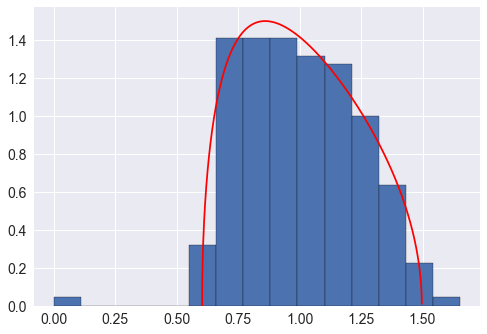

In [292]:
phist(evals_p[:])
plt.plot(l_p,m_p,'r')

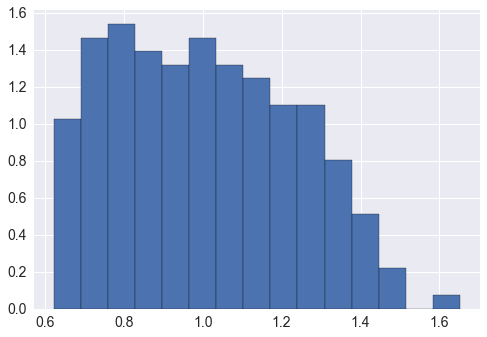

In [290]:
phist(evals_ag1[-199:])

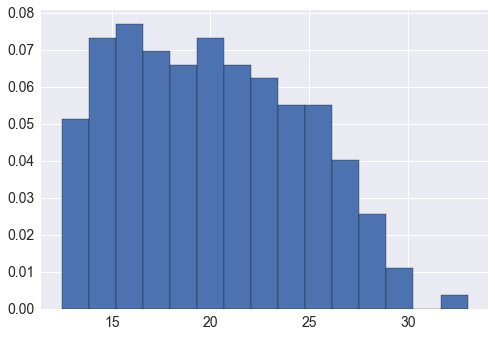

In [291]:
phist(evals_ag2[-199:])

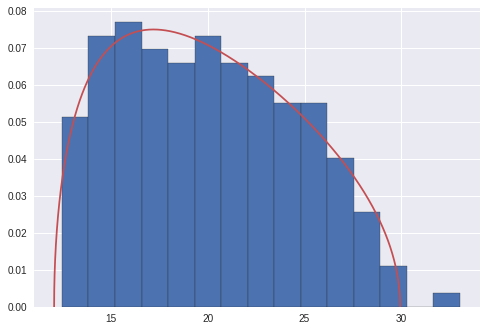

In [135]:
x,y, _ =plt.hist(evals_ag2[-199:],density = True,ec="k", bins = 15)
plt.plot(l_ag,m_ag, 'r')

In [30]:
outlier_p = evecs_p[0]
outlier_ag2 = evecs_ag2[-1]
outlier_ag1 = evecs_ag1[-1]

### Generating new matrix out of the outlying eigenvector

In [250]:
y = gen_random_matrix()

In [313]:
s = 3.35
# delta_w = np.random.uniform(size = (200,)
delta_w = np.random.normal(loc=0, scale=s, size = (200,))
# sigma_mu = np.random.uniform(size = (4000))
# m_mu = np.random.uniform(size = (4000))
sigma_mu = np.random.normal(loc = 0, scale = 1, size = (4000,))
m_mu = np.random.normal(loc = 0, scale = 1, size = (4000,))
print sigma_mu.shape, m_mu.shape

(4000,) (4000,)


In [45]:
new_xi_0 = np.zeros((4000,200)) # with eta = 0
new_xi_1 = np.zeros((4000,200)) # with eta = 1

In [46]:
eta_0 = 0.0
eta_1 = 1.0
# test_vec = np.ones((4000))
# print np.linalg.norm(test_vec)
# test_vec = test_vec/np.linalg.norm(test_vec)
# print np.linalg.norm(test_vec)

In [47]:
for i in range(4000):
    for j in range(200):
        
#         new_xi[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta*delta_w[j]*test_vec[i])
        new_xi_0[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_0*delta_w[j]*outlier_ag[i])
        new_xi_1[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_1*delta_w[j]*outlier_ag[i])

NameError: name 'outlier_ag' is not defined

In [317]:
print np.average(new_xi_1[0])

-0.537527091181751


In [318]:
norm_xi_0_ag = normalize_matrix(new_xi_0)
norm_xi_1_ag = normalize_matrix(new_xi_1)
norm_xi_1_p = normalize_matrix(new_xi_1.T)
norm_xi_0_p = normalize_matrix(new_xi_0.T)

In [319]:
print norm_xi_0_ag.shape, norm_xi_0_p.shape

(4000, 200) (200, 4000)


In [320]:
norm_xi_0_ag_evals = compute_evals(norm_xi_0_ag)
norm_xi_0_p_evals = compute_evals(norm_xi_0_p)
norm_xi_1_ag_evals = compute_evals(norm_xi_1_ag)
norm_xi_1_p_evals = compute_evals(norm_xi_1_p)


In [321]:
print norm_xi_0_p_evals == norm_xi_1_p_evals

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

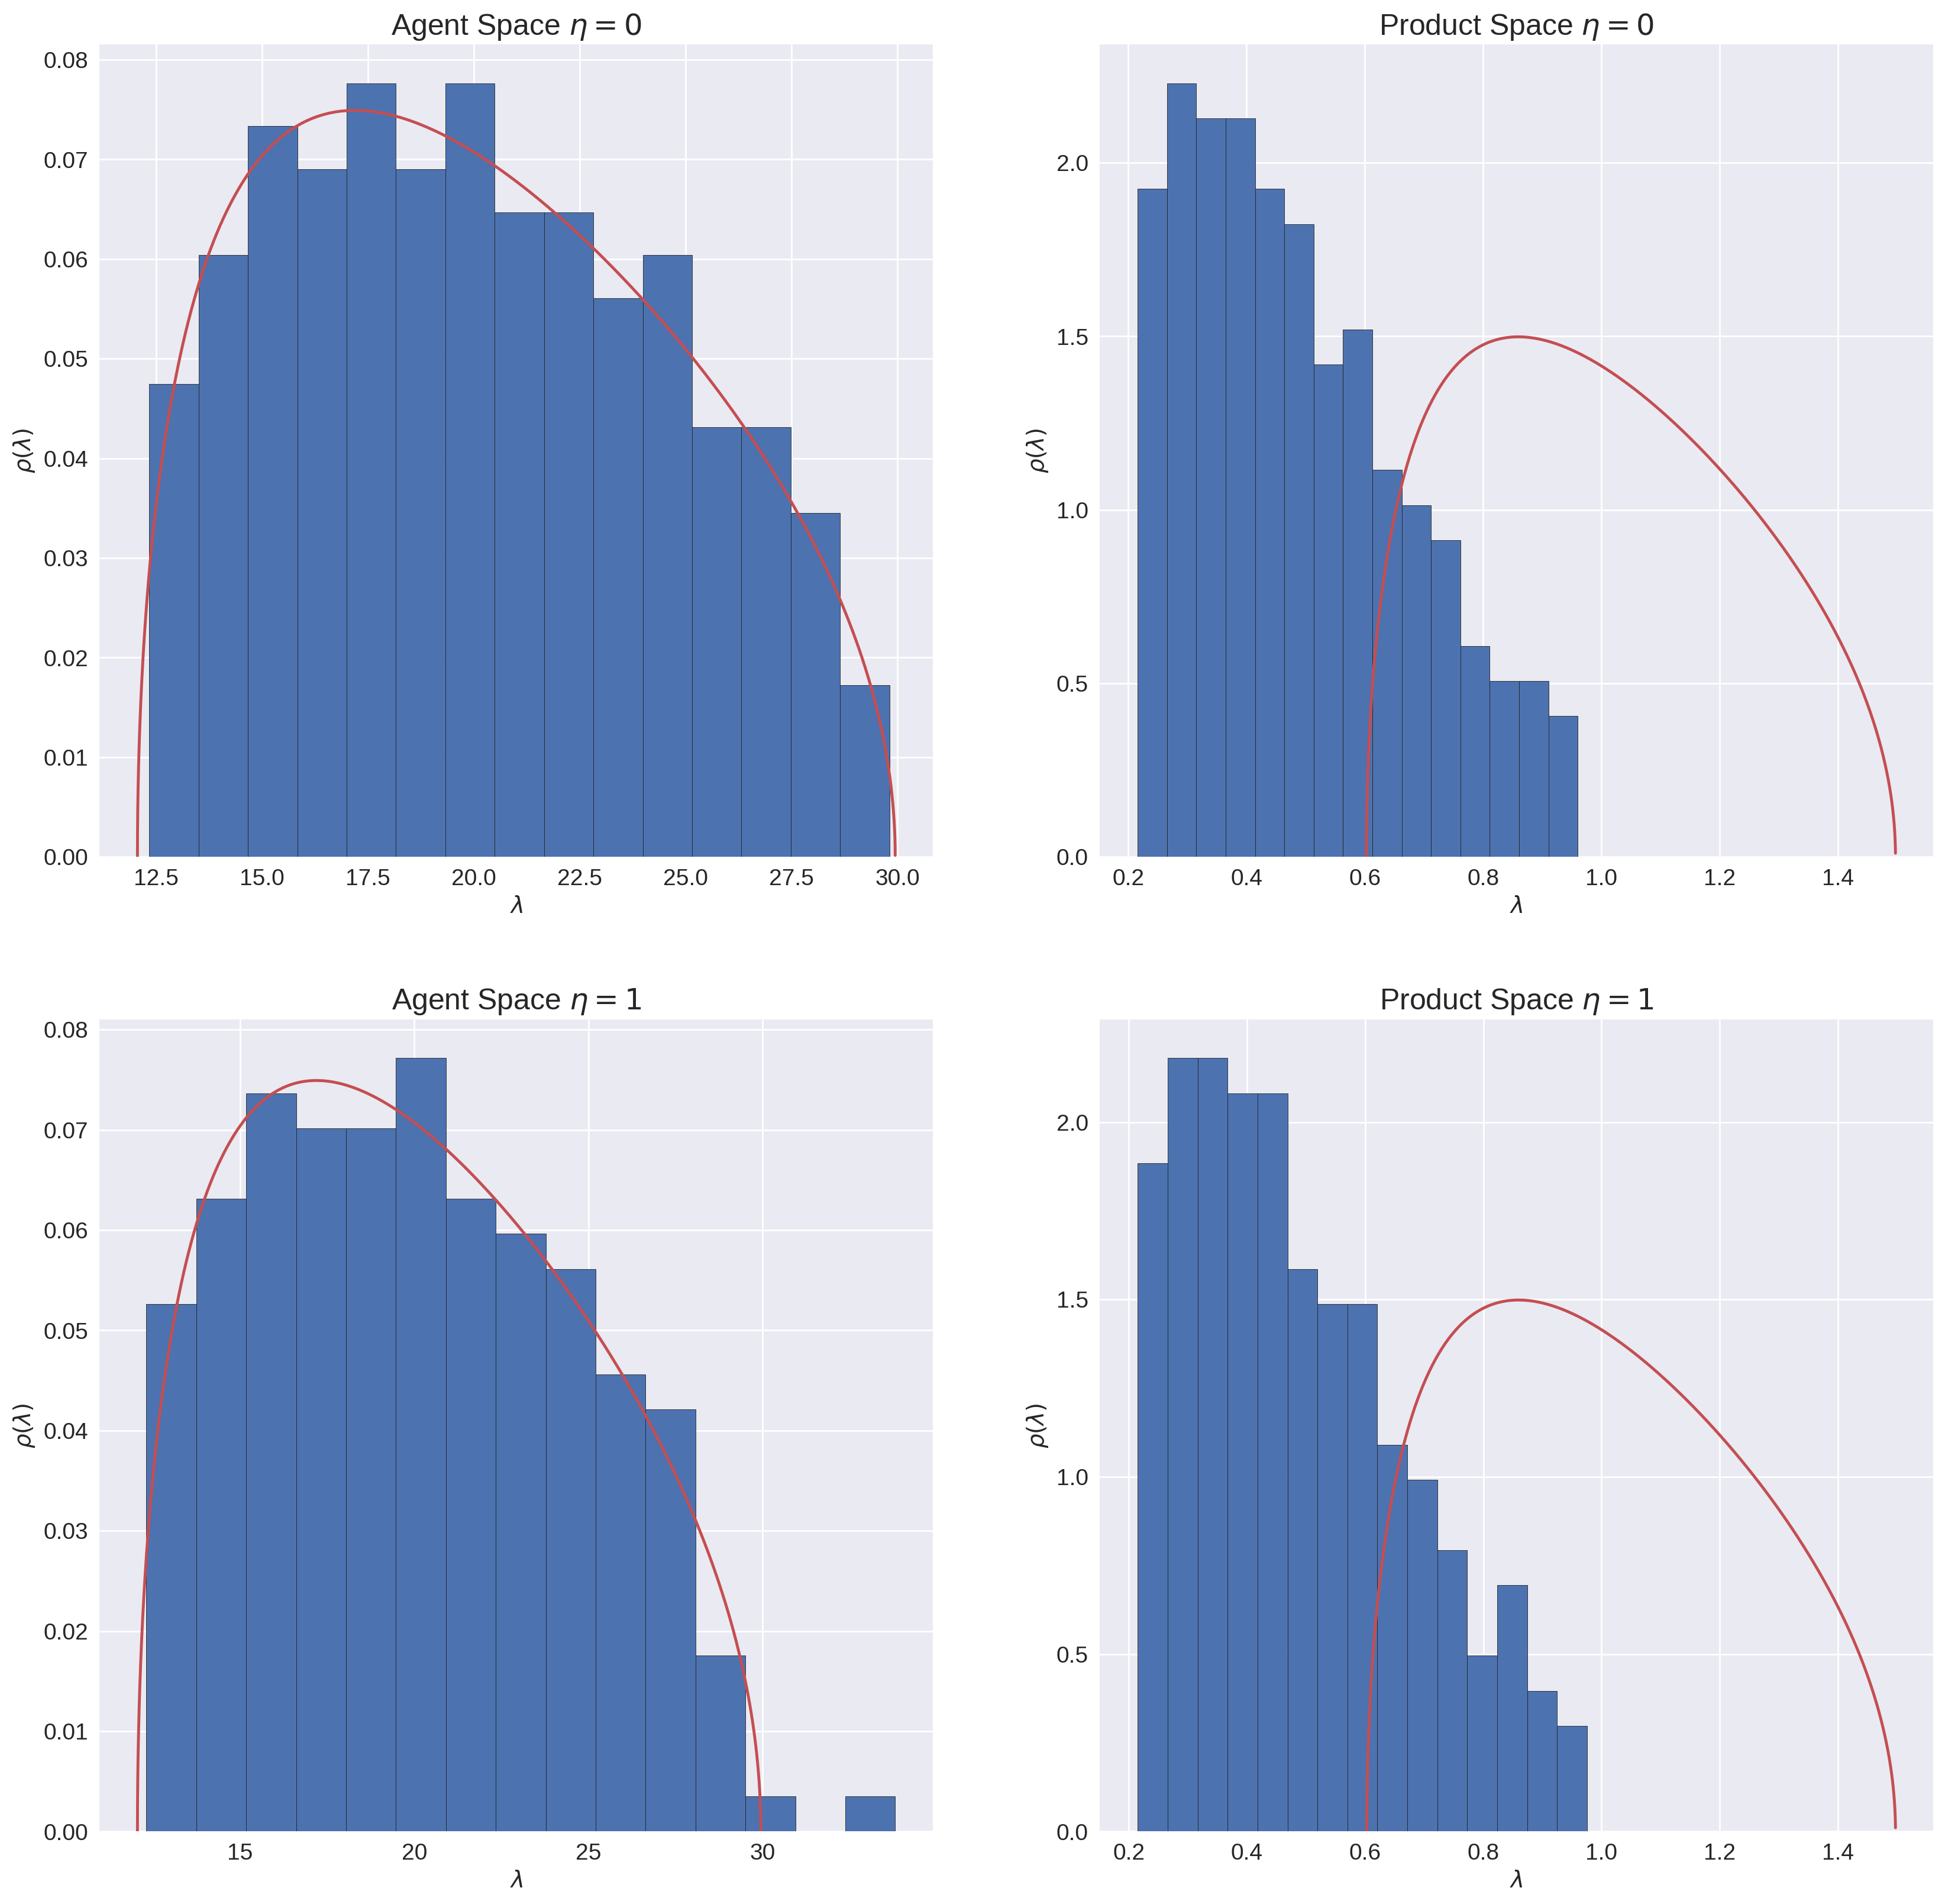

In [335]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(221)
phist(norm_xi_0_ag_evals[-199:])
# x1, y1, _ = plt.hist(norm_xi_0_ag_evals[-199:], ec = "k", bins = 15, density = True)
plt.plot(l_ag, m_ag, 'r')
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=0$', fontsize = 18)
plt.subplot(222)
phist(norm_xi_0_p_evals[:199])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=0$', fontsize = 18)
# plt.hist(norm_xi_0_p_evals[:],density = True,  ec = "k", bins = 15)
plt.plot(l_p,m_p,'r')
plt.subplot(223)
phist(norm_xi_1_ag_evals[-199:])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_ag_evals[-199:], density = True, ec = "k", bins = 15)
plt.plot(l_ag, m_ag, 'r')
plt.subplot(224)
phist(norm_xi_1_p_evals[:199])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_p_evals[:], density = True, ec = "k", bins = 15)
plt.plot(l_p, m_p, 'r')
plt.savefig('plots/strange_eigen_value/random_averages.png')
plt.savefig('plots/strange_eigen_value/random_averages.pdf')

## Check distribution of $y_{i}^{\mu}$
Lets check whether the distribution for $y_{i}^{\mu}$ is the same as that for the normalized (new) $\xi_{i}^{\mu}$. 

In [180]:
norm_y_ag = normalize_matrix(y)
norm_y_p = normalize_matrix(y.T)

In [181]:
y_evals_p = compute_evals(norm_y_p)
y_evals_ag = compute_evals(norm_y_ag)

In [182]:
y_p = compute_evals(y.T)
y_ag = compute_evals(y)

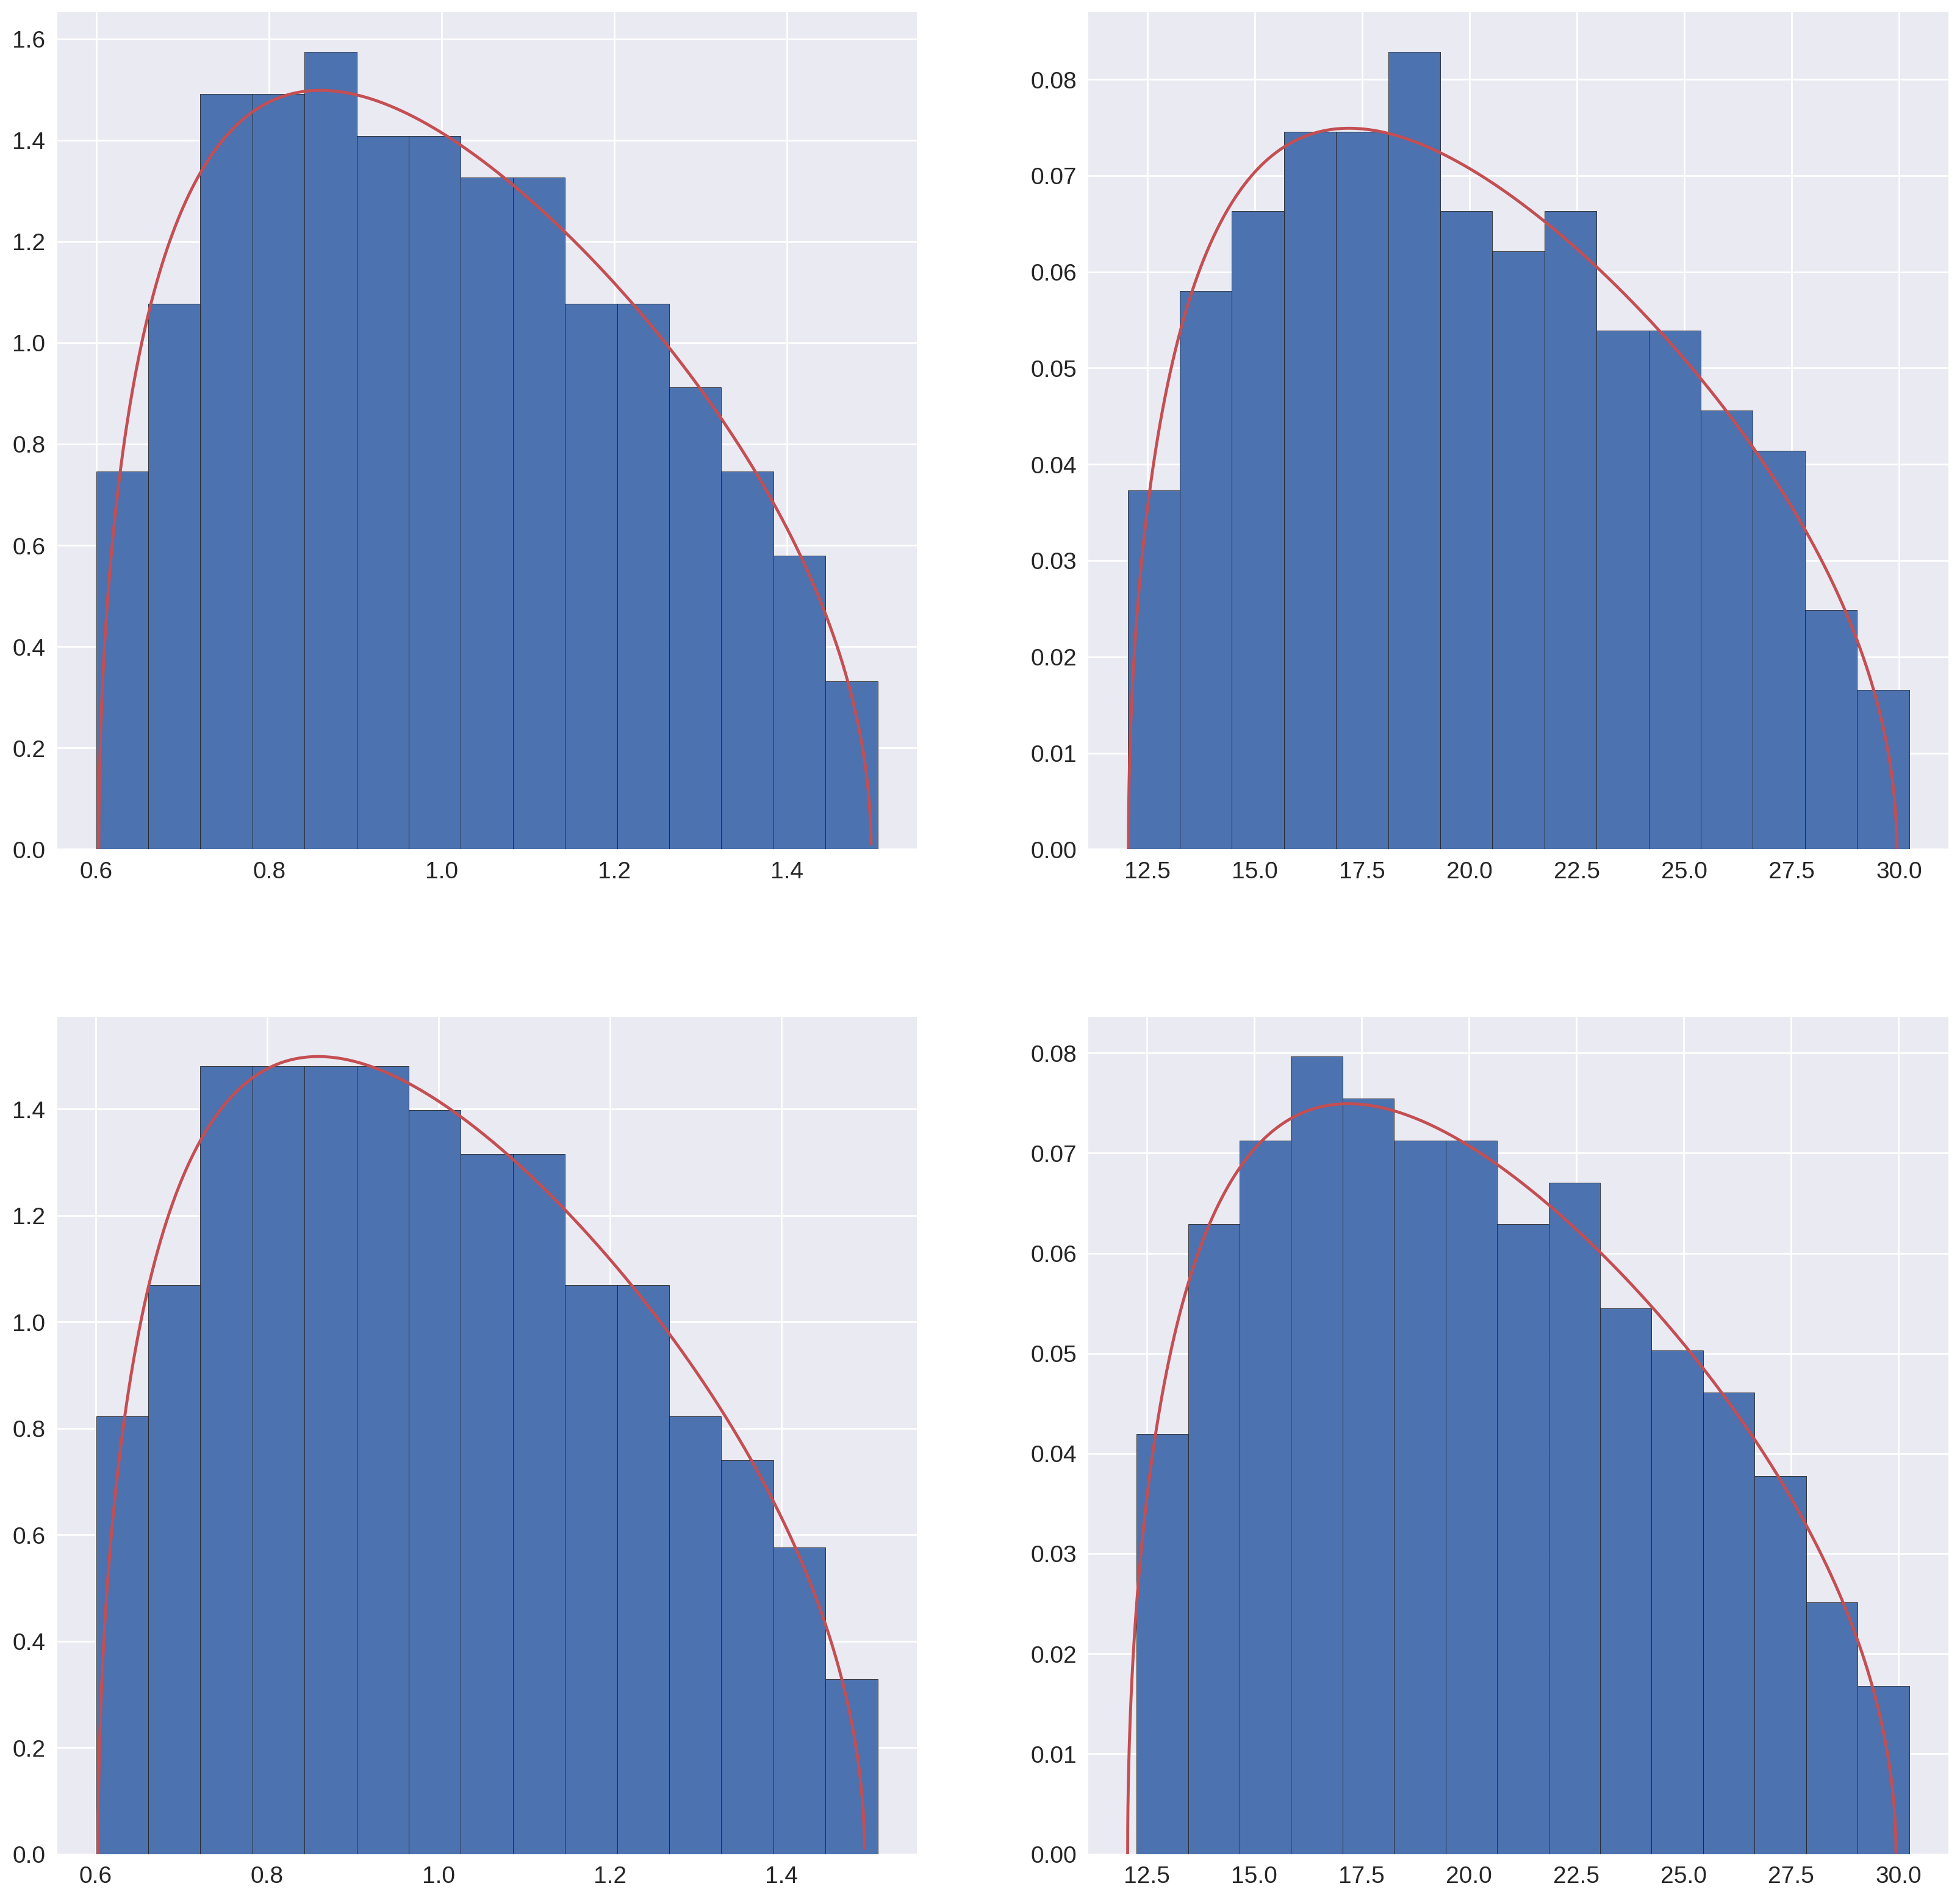

In [183]:
plt.figure(figsize=(20,20), dpi = 200)
plt.subplot(221)
# plt.hist(y_evals_p, density = True, ec = "k", bins = 15)
phist(y_evals_p)
plt.plot(l_p,m_p,'r')
plt.subplot(222)
phist(y_evals_ag[-199:])
plt.plot(l_ag,m_ag,'r')
plt.subplot(223)
phist(y_p)
plt.plot(l_p,m_p,'r')
plt.subplot(224)
phist(y_ag[-199:])
plt.plot(l_ag, m_ag, 'r')

## Check with different outlying vector $e_{i}^{1}$

Lets take the vector of all ones as the vector $e_{i}^{1}$

In [327]:
new_xi_0_bis = np.zeros((4000,200)) # with eta = 0
new_xi_1_bis = np.zeros((4000,200)) # with eta = 1

In [328]:
eta_0 = 0.0
eta_1 = 1.0
test_vec = np.ones((4000))
print np.linalg.norm(test_vec)
test_vec = test_vec/np.linalg.norm(test_vec)
print np.linalg.norm(test_vec)

63.245553203367585
1.0000000000000002


In [329]:
for i in range(4000):
    for j in range(200):
        
#         new_xi[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta*delta_w[j]*test_vec[i])
        new_xi_0_bis[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_0*delta_w[j]*test_vec[i])
        new_xi_1_bis[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_1*delta_w[j]*test_vec[i])

In [330]:
norm_xi_0_ag_bis = normalize_matrix(new_xi_0_bis)
norm_xi_0_p_bis = normalize_matrix(new_xi_0_bis.T)
norm_xi_1_ag_bis = normalize_matrix(new_xi_1_bis)
norm_xi_1_p_bis = normalize_matrix(new_xi_1_bis.T)

In [380]:
norm_xi_0_ag_bis_evals,norm_xi_0_ag_bis_evecs = compute_evecs(norm_xi_0_ag_bis)
norm_xi_0_p_bis_evals, norm_xi_0_p_bis_evecs= compute_evecs(norm_xi_1_p_bis)
norm_xi_1_ag_bis_evals, norm_xi_1_ag_bis_evecs = compute_evecs(norm_xi_1_ag_bis)
norm_xi_1_p_bis_evals, norm_xi_1_p_bis_evecs = compute_evecs(norm_xi_1_p_bis)


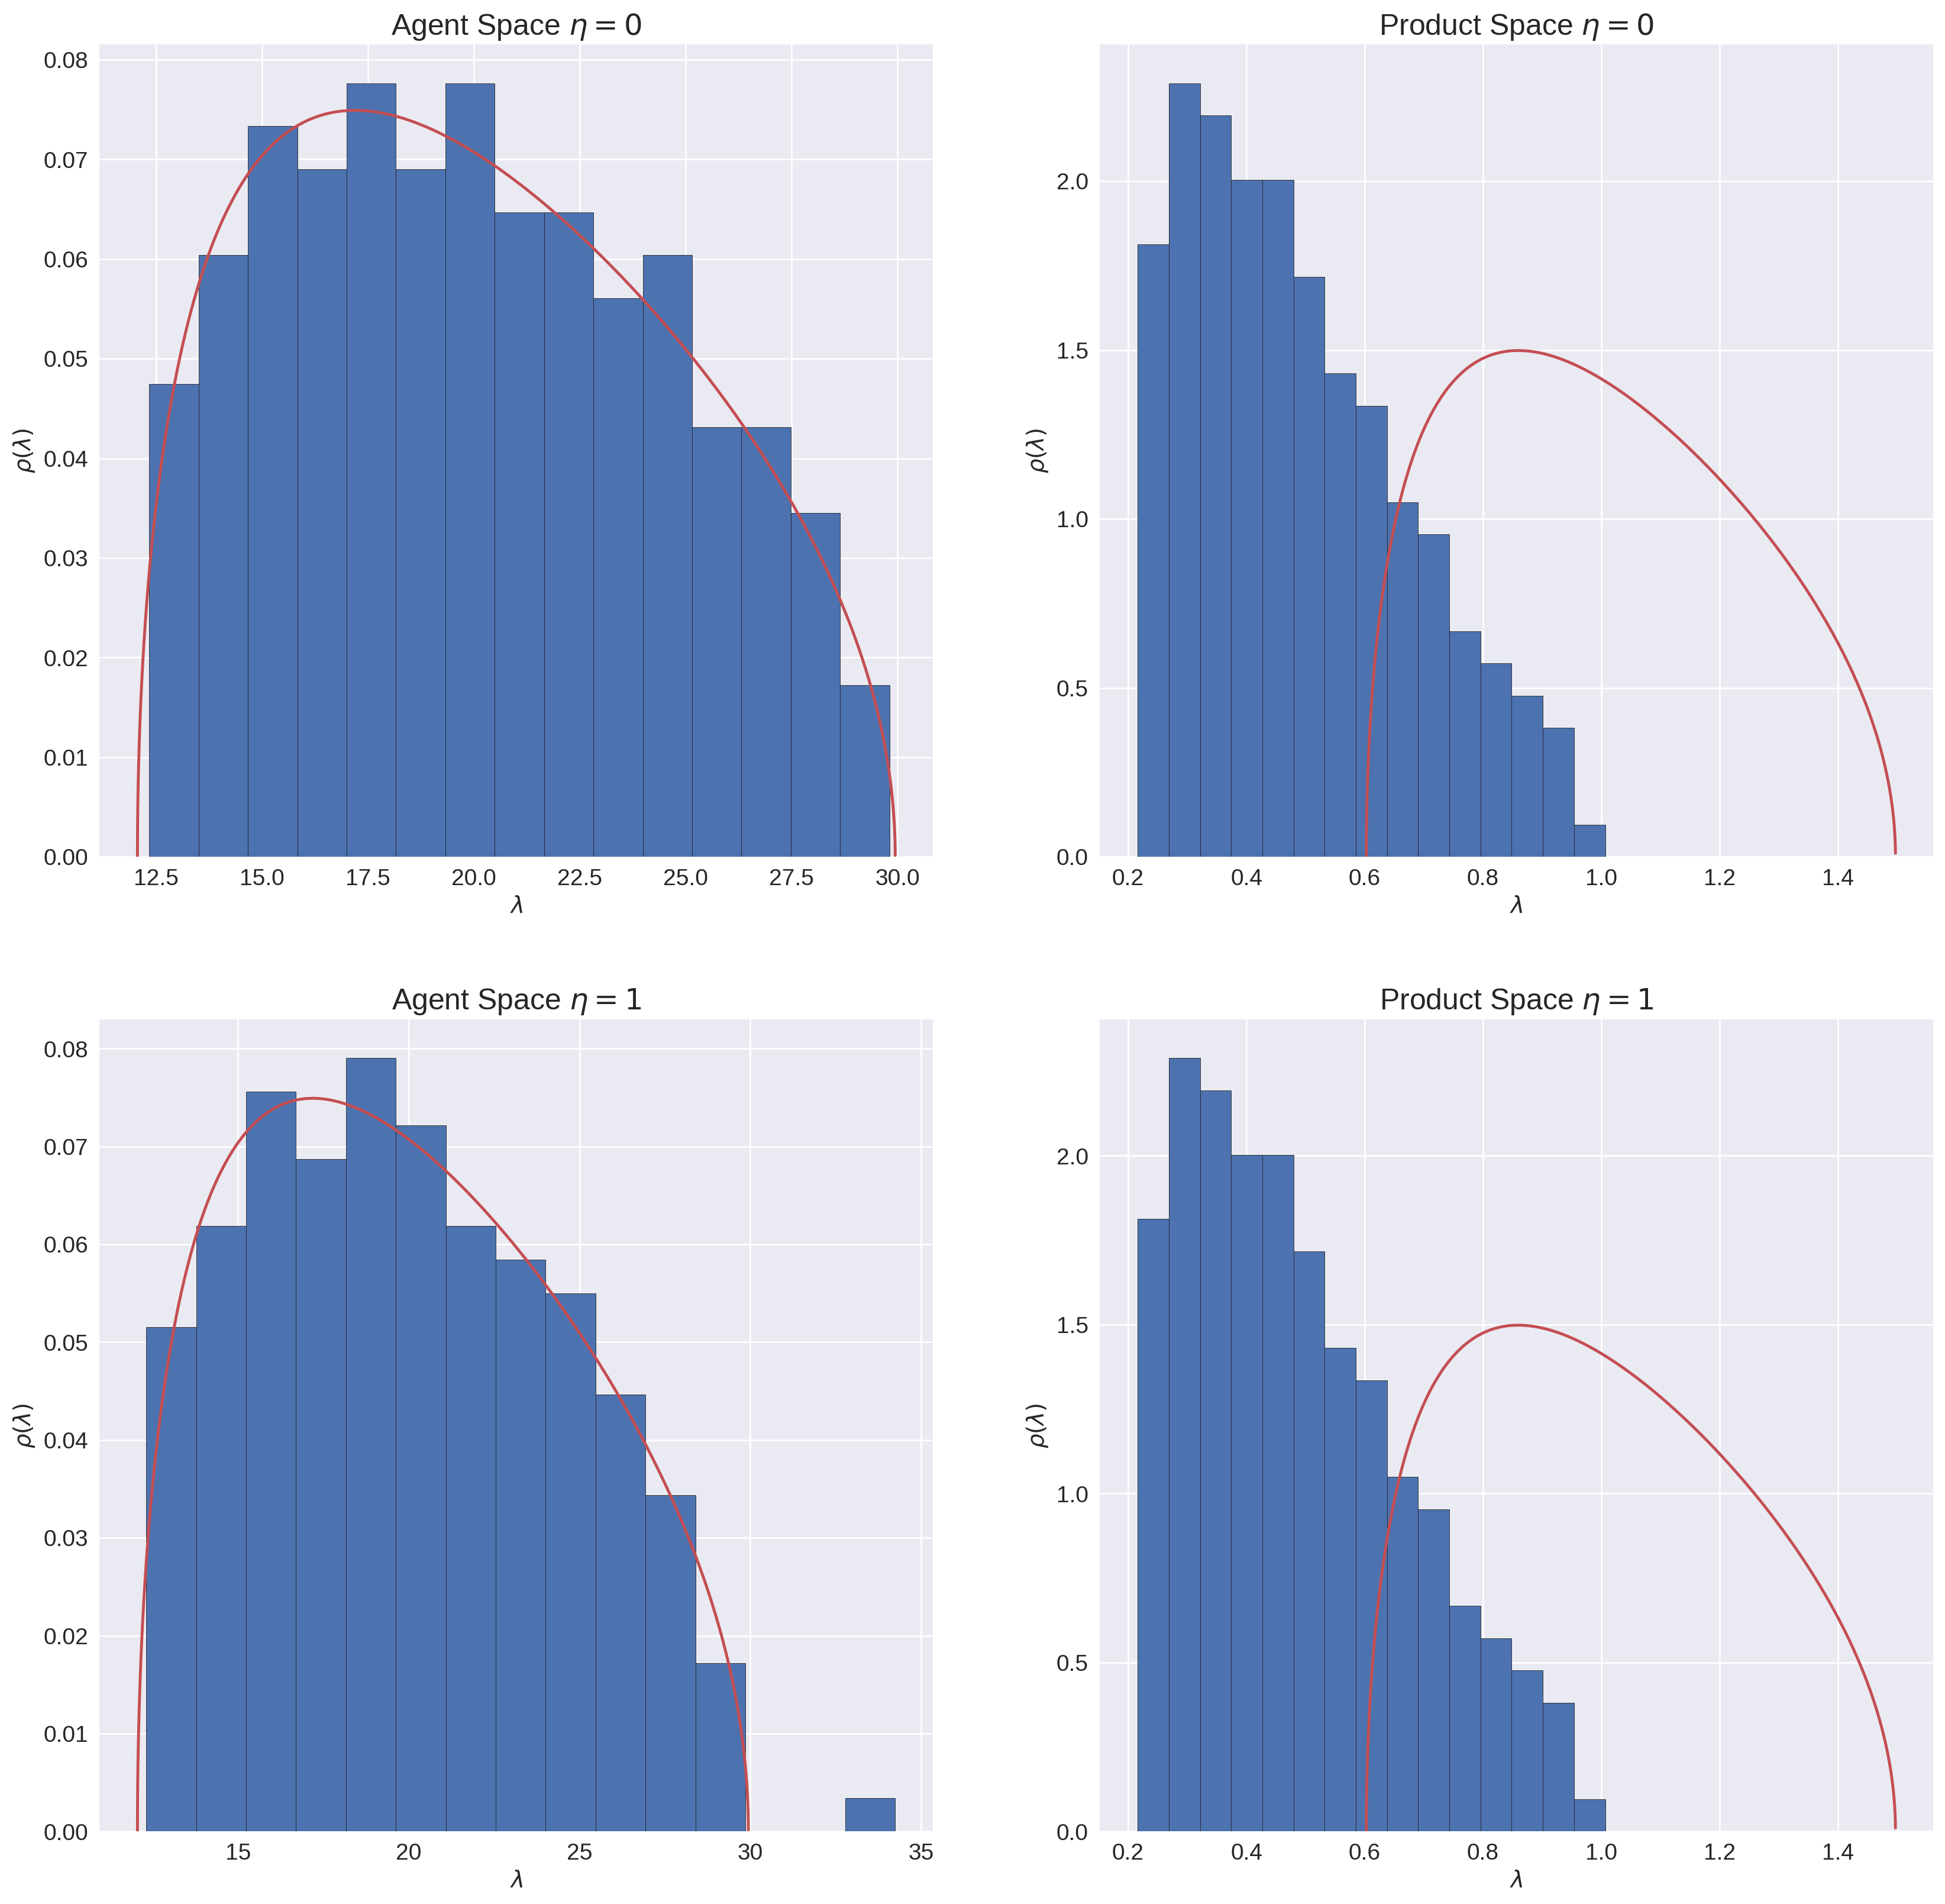

In [381]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(221)
phist(norm_xi_0_ag_bis_evals[-199:])
# x1, y1, _ = plt.hist(norm_xi_0_ag_evals[-199:], ec = "k", bins = 15, density = True)
plt.plot(l_ag, m_ag, 'r')
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=0$', fontsize = 18)
plt.subplot(222)
phist(norm_xi_0_p_bis_evals[:199])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=0$', fontsize = 18)
# plt.hist(norm_xi_0_p_evals[:],density = True,  ec = "k", bins = 15)
plt.plot(l_p,m_p,'r')
plt.subplot(223)
phist(norm_xi_1_ag_bis_evals[-199:])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_ag_evals[-199:], density = True, ec = "k", bins = 15)
plt.plot(l_ag, m_ag, 'r')
plt.subplot(224)
phist(norm_xi_1_p_bis_evals[:199])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_p_evals[:], density = True, ec = "k", bins = 15)
plt.plot(l_p, m_p, 'r')
# plt.savefig('plots/strange_eigen_value/random_outlier.png')
# plt.savefig('plots/strange_eigen_value/random_outlier.pdf')

In [190]:
outliers_p = norm_xi_0_p_bis_evals[norm_xi_0_p_bis_evals < l_p[0]]

In [191]:
outliers_p.shape

(142,)

## Outlying vector with dropout 

We remove some components of the vector at random and observe whether we can recreate the  strange eigenvalue phenomena

In [384]:
1./get_ipr(outlier_ag)

1180.3178401600533

In [193]:
1./get_ipr(outlier_p)

69.40125468736488

In [194]:
N = 4000
p = 0.45
selection = int(p*N)
set_zero = np.random.choice(np.arange(N), size = selection, replace = False)

In [195]:
new_outlier_ag = np.copy(outlier_ag)
new_outlier_ag[set_zero] = 0.0

In [196]:
new_xi_random = np.zeros((4000,200))

In [197]:
# print np.linalg.norm(new_outlier_ag)
# new_outlier_ag = new_outlier_ag/np.linalg.norm(new_outlier_ag)
# print np.linalg.norm(new_outlier_ag)

In [198]:
for i in range(4000):
    for j in range(200):
        
        new_xi_random[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + 1.0*delta_w[j]*new_outlier_ag[i])
#         new_xi_0_bis[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_0*delta_w[j]*test_vec[i])
#         new_xi_1_bis[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_1*delta_w[j]*test_vec[i])

In [199]:
norm_xi_random_ag = normalize_matrix(new_xi_random)
norm_xi_random_p = normalize_matrix(new_xi_random.T)


In [200]:
print norm_xi_random_p.shape[1]

4000


In [201]:
norm_xi_random_ag_evals = compute_evals(norm_xi_random_ag)
norm_xi_random_p_evals = compute_evals(norm_xi_random_p)

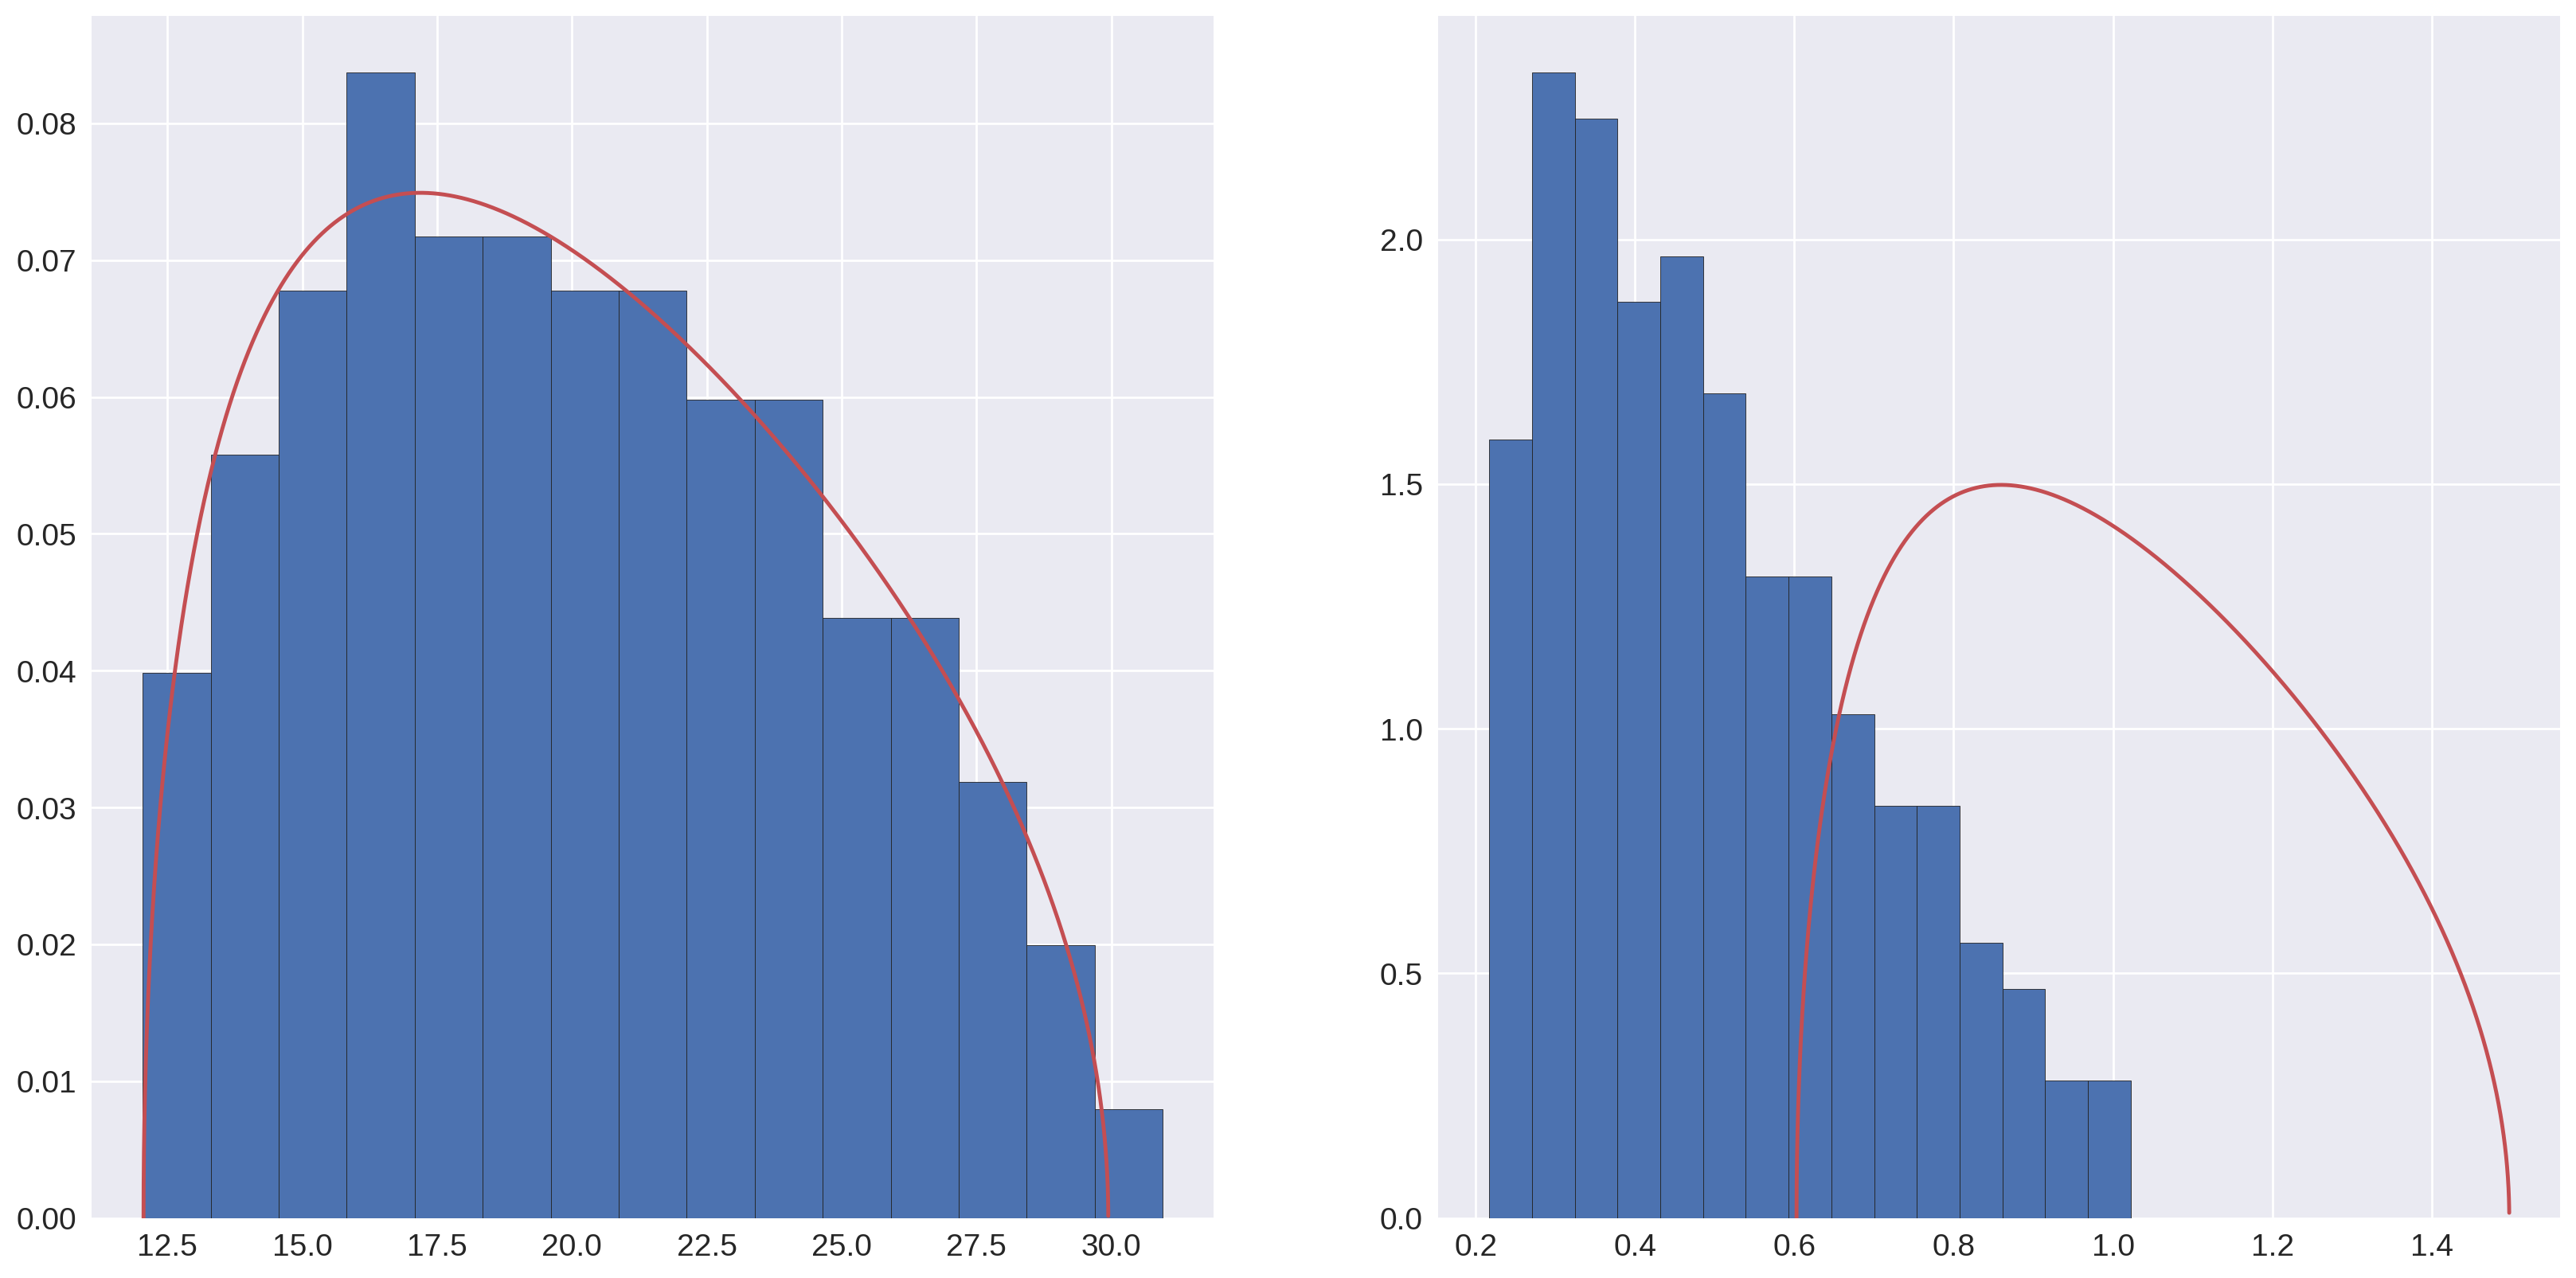

In [202]:
plt.figure(figsize=(20,10), dpi=200)
plt.subplot(121)
phist(norm_xi_random_ag_evals[-199:])
plt.plot(l_ag,m_ag, 'r')
plt.subplot(122)
phist(norm_xi_random_p_evals[:199])
plt.plot(l_p,m_p, 'r')

In [203]:
print norm_xi_random_ag_evals[-1], l_ag[-1], norm_xi_random_p_evals[-2]

30.954567084709915 29.94432808995915 1.0221193288262491


## Fitting the transposed distribution to MP Law 

We try fitting the new MP law via the parameters $\sigma^2$ and $q$. The lower and upper edges, which we call $b$ and $a$ respectively are :

\begin{align}
a &= \sigma^{2}(1+\sqrt{q})^2 \\
b &= \sigma^{2}(1-\sqrt{q})^2
\end{align}

Solving for $q$ we have, 

\begin{align}
\frac{1}{q} &= \Big( \frac{\sqrt{a} + \sqrt{b}}{\sqrt{a}-\sqrt{b}} \Big) ^2
\end{align}

and $\sigma^{2}$ is:

\begin{align}
\sigma^{2} = \frac{a}{(1+\sqrt{q})^2}
\end{align}

In [349]:
a = norm_xi_random_p_evals[-2]
b = norm_xi_random_p_evals[0]

def getq(a,b):
    den = (np.sqrt(a) + np.sqrt(b))**2
    num = (np.sqrt(a) - np.sqrt(b))**2 
    q = num/den
    var1 = a/(1+np.sqrt(q))**2
    var2  = b/(1-np.sqrt(q))**2
    return q, var1, var2
    

In [350]:
q,var,_ = getq(a,b)

In [376]:
l_fit, m_fit = mplaw(1./q, var = var)

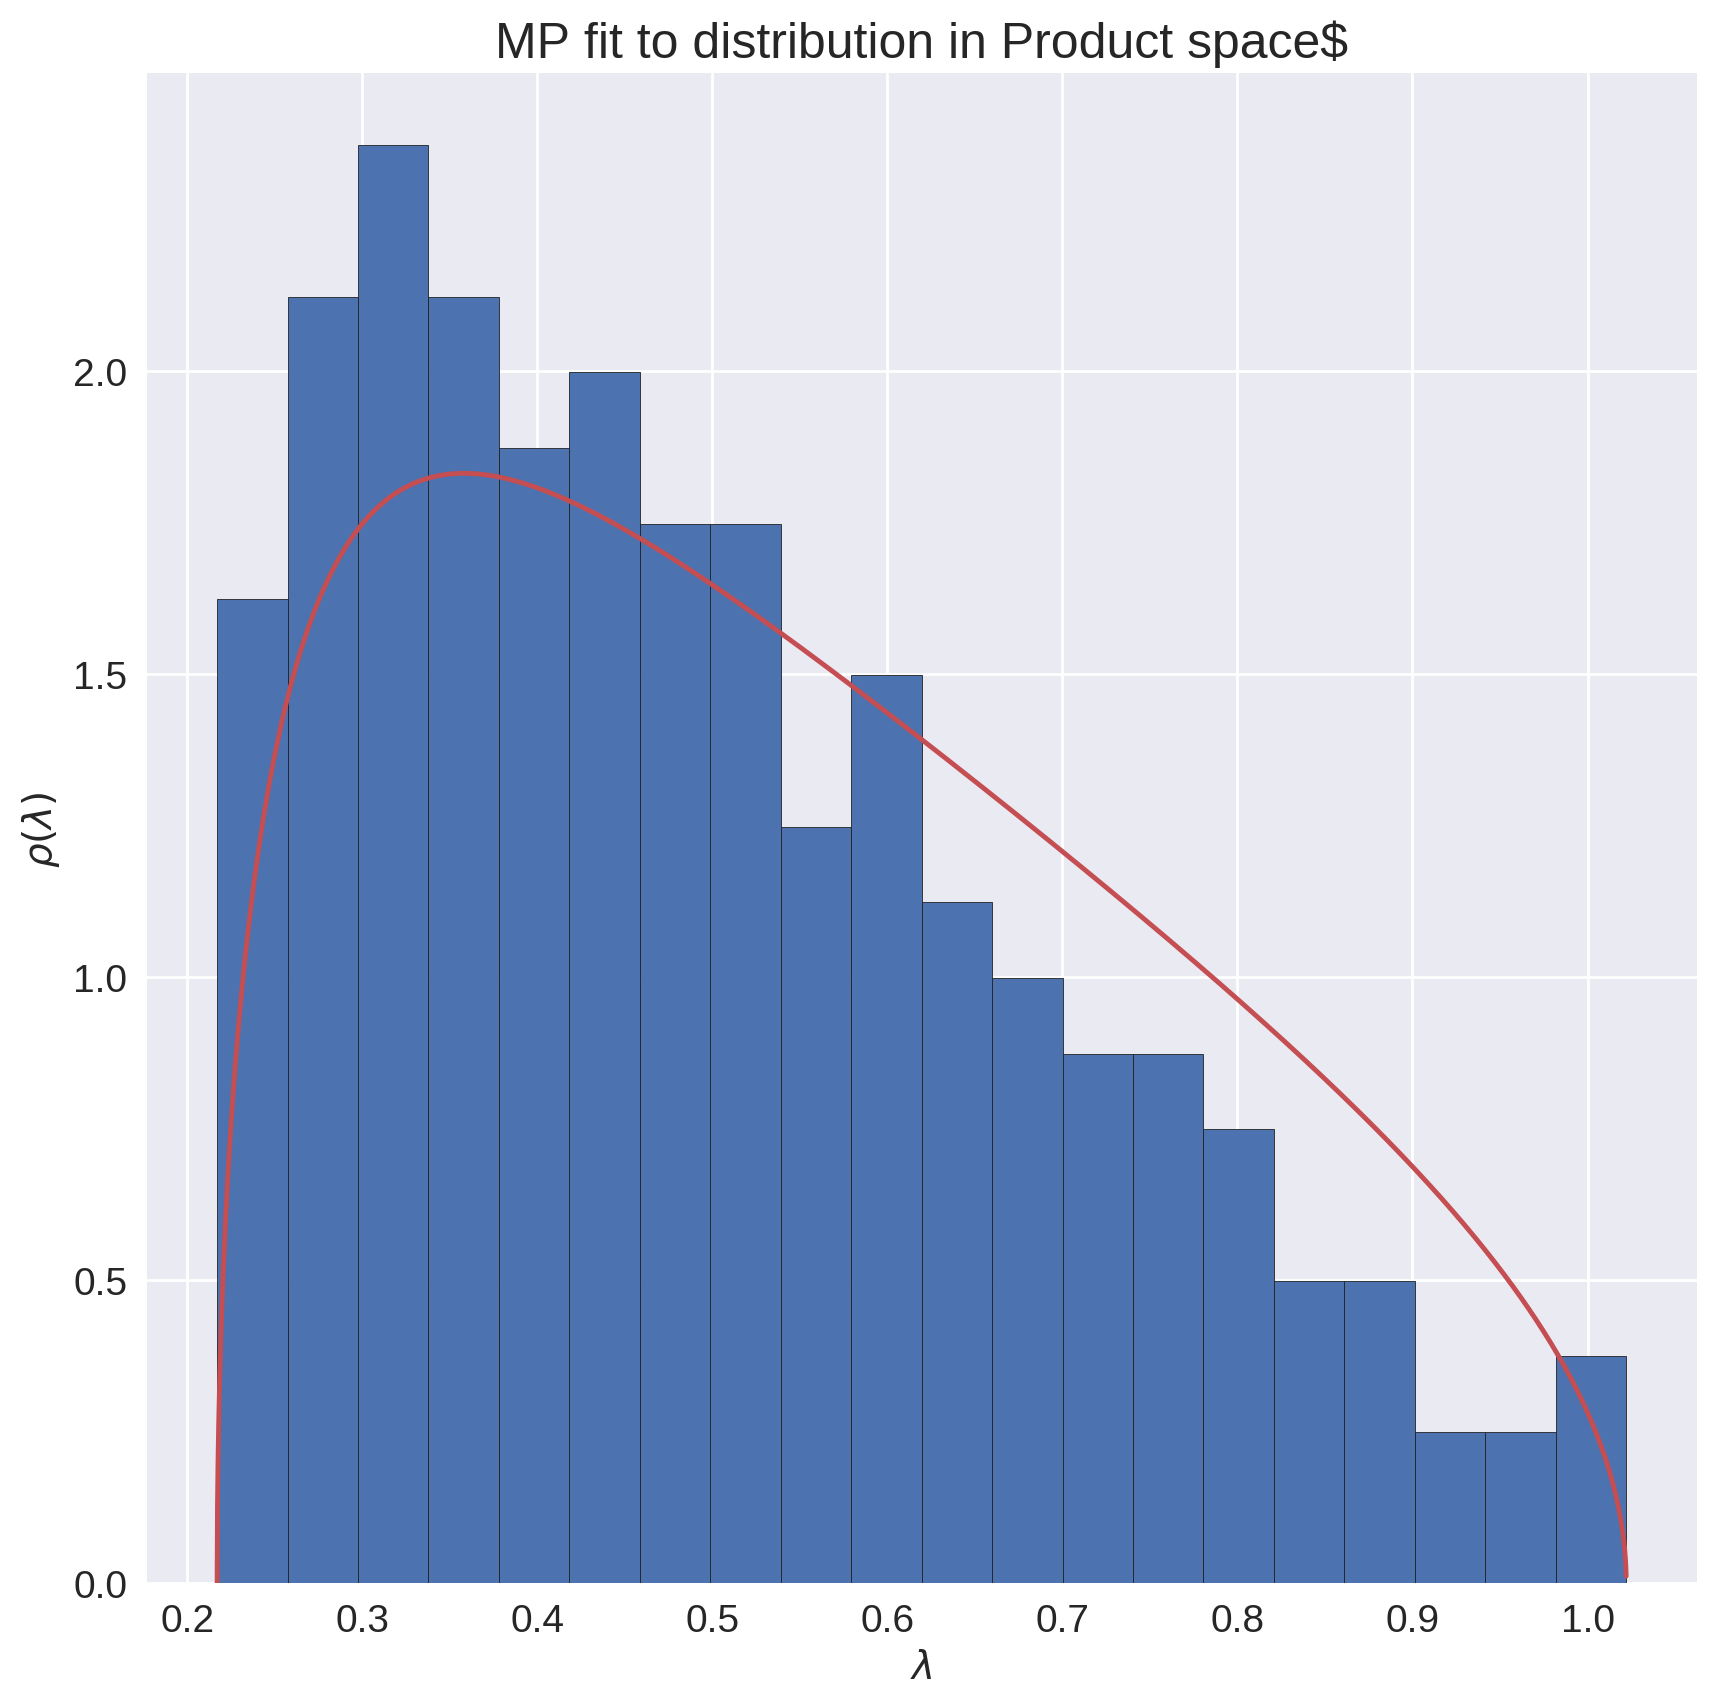

In [378]:
plt.figure(figsize = (10,10), dpi=200)
phist(norm_xi_random_p_evals[:199],bins=20)
plt.plot(l_fit, m_fit, 'r')
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('MP fit to distribution in Product space$', fontsize = 18)
plt.savefig('plots/strange_eigen_value/mp_fit.png')
plt.savefig('plots/strange_eigen_value/mp.fit.pdf')

In [413]:
print var

0.5453202307914964


In [353]:
print 1./q

7.341543811229623


In [370]:
q1 = 1./20
print var*(1+np.sqrt(q))**2, var*(1-np.sqrt(q))**2, a, b
l_range = np.arange(b,a+1e-6,1e-6 )
mp_vals = []
# var1 = var 
var1 = 1./s
for l in l_range:
    num = np.sqrt((a-l)*(l-b))
    den = 2*np.pi*(l*q)*var1
    mp_vals.append(num/den)

1.0221193288262491 0.21707850565081394 1.0221193288262491 0.21707850565081394


/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


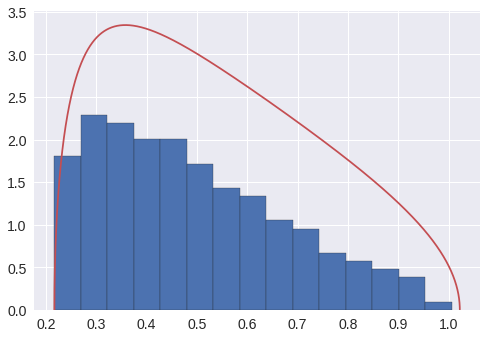

In [371]:
phist(norm_xi_1_p_bis_evals[:199])
plt.plot(l_range, mp_vals, 'r')

In [360]:
print var

0.5453202307914964


# Mean and variances from the empirical matrix $\xi_{\mu}^{i}$

In [313]:
new_xi_0 = np.zeros((4000,200))
new_xi_1 = np.zeros((4000,200))
y = gen_random_matrix()

In [314]:
test_vec = np.ones((4000))
print np.linalg.norm(test_vec)
test_vec = test_vec/np.linalg.norm(test_vec)
print np.linalg.norm(test_vec)

63.245553203367585
1.0000000000000002


In [315]:
# s = evals_ag1[-1]
s = evals_ag1[-1]
print s 

1.651751290966885


In [316]:
print evals_ag1[-1]

1.651751290966885


In [317]:
eta_0 = 0
eta_1 = 1

In [318]:
m_mu = np.mean(xia, axis=1)
# m_mu = np.zeros((4000))
sigma_mu = np.std(xia, axis=1)
delta_w = np.random.normal(loc=0, scale=s, size = (200,))
print m_mu.shape

(4000,)


In [325]:
evals, evecs = compute_evecs(normalize_matrix(xia), div=4000)

In [326]:
print outlier_ag1.shape
print m_mu.shape
print evals[-1]

(4000,)
(4000,)
1.651751290966885


In [337]:
outlier_ag1 = evecs[:,-1]

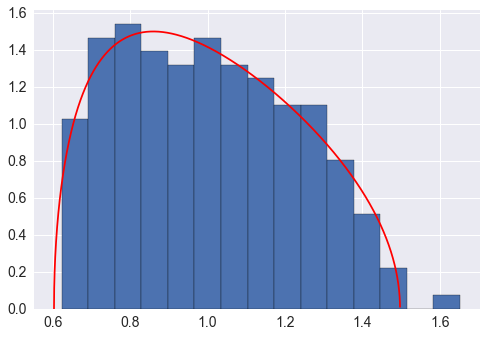

In [338]:
phist(evals[-199:])
plt.plot(l_p,m_p, 'r')

In [339]:
for i in range(4000):
    for j in range(200):
#         new_xi_0[i,j] = m_mu[i] + sigma_mu[i]*y[i,j]*(1+eta_0*delta_w[j]*test_vec[i])
        
#         new_xi[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta*delta_w[j]*test_vec[i])
        new_xi_0[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] - eta_0*delta_w[j]*outlier_ag1[i])
        new_xi_1[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] - eta_1*delta_w[j]*outlier_ag1[i])

#         new_xi_0[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_0*delta_w[j]*test_vec[i])
#         new_xi_1[i,j] = m_mu[i] + sigma_mu[i]*(y[i,j] + eta_1*delta_w[j]*test_vec[i])

In [340]:
norm_xi_0_ag = normalize_matrix(new_xi_0)
norm_xi_1_ag = normalize_matrix(new_xi_1)
norm_xi_1_p = normalize_matrix(new_xi_1.T)
norm_xi_0_p = normalize_matrix(new_xi_0.T)

In [341]:
norm_xi_0_ag_evals = compute_evals(norm_xi_0_ag,div = 4000)
norm_xi_0_p_evals = compute_evals(norm_xi_0_p, div = 4000)
norm_xi_1_ag_evals = compute_evals(norm_xi_1_ag,div = 4000)
norm_xi_1_p_evals = compute_evals(norm_xi_1_p,div=4000)


Text(0.5,0.98,u'New model for strange eigenvalues (No mean added)')

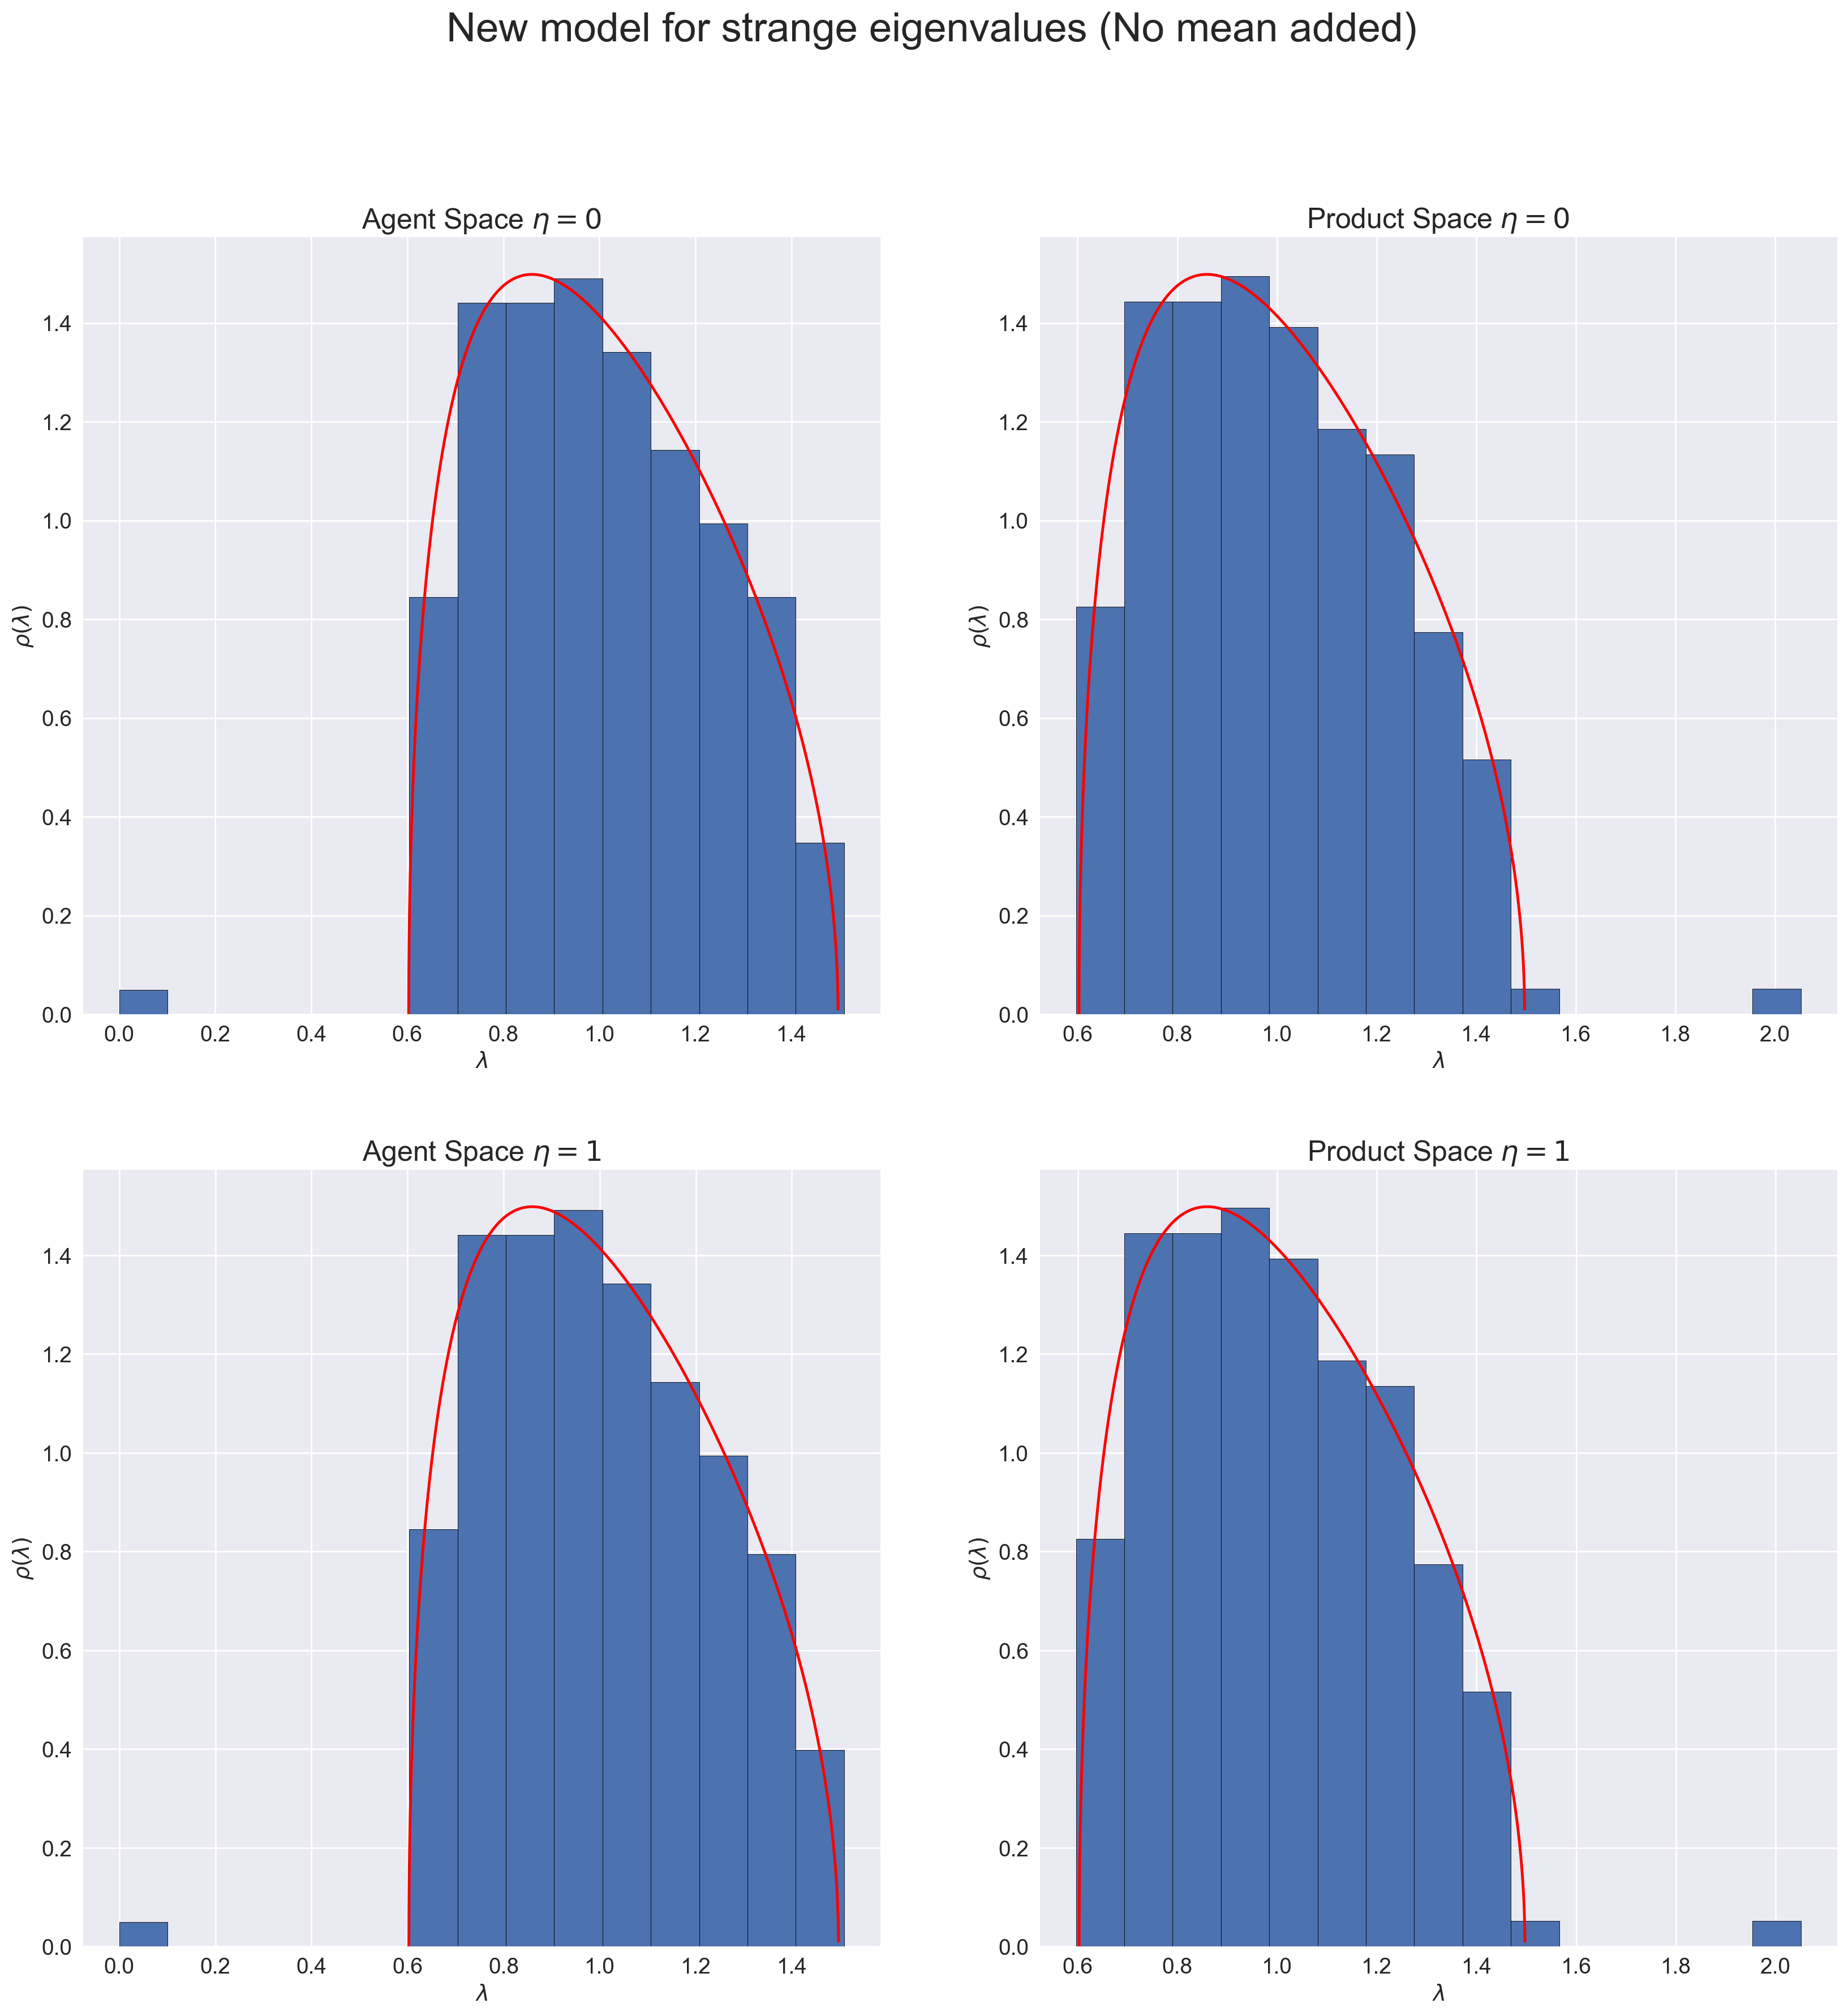

In [343]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(221)
phist(norm_xi_0_ag_evals[-200:])
# x1, y1, _ = plt.hist(norm_xi_0_ag_evals[-199:], ec = "k", bins = 15, density = True)
plt.plot(l_p, m_p, 'r')
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=0$', fontsize = 18)
plt.subplot(222)
phist(norm_xi_0_p_evals[:])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=0$', fontsize = 18)
# plt.hist(norm_xi_0_p_evals[:],density = True,  ec = "k", bins = 15)
plt.plot(l_p,m_p,'r')
plt.subplot(223)
phist(norm_xi_1_ag_evals[-200:])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Agent Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_ag_evals[-199:], density = True, ec = "k", bins = 15)
plt.plot(l_p, m_p, 'r')
plt.subplot(224)
phist(norm_xi_1_p_evals[:])
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Product Space $\eta=1$', fontsize = 18)
# plt.hist(norm_xi_1_p_evals[:], density = True, ec = "k", bins = 15)
plt.plot(l_p, m_p, 'r')
plt.suptitle('New model for strange eigenvalues (No mean added)', fontsize = 26)
# plt.savefig('plots/strange_eigen_value/average_from_matrix_bis_centered_no_mean.png')
# plt.savefig('plots/strange_eigen_value/average_from_matrix_bis_centered_no_mean.pdf')

In [261]:
print m_mu

[ 0.07115297 -0.05198417 -0.02413576 ... -0.05222134 -0.00585472
  0.09639329]


In [262]:
sigma_i = np.std(xia, axis=0)


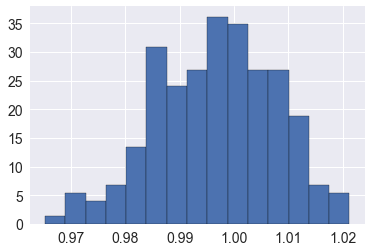

In [266]:
phist(sigma_i)

In [267]:
cova_p[0,0]

4000.0

In [274]:
cova = xia.T.dot(xia)

In [275]:
cova = cova/4000

In [276]:
es = np.linalg.eigvalsh(cova)

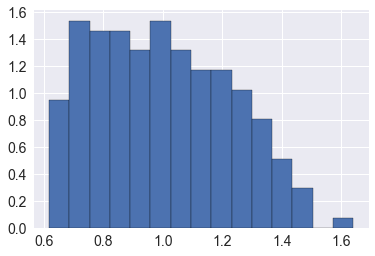

In [277]:
phist(es[-200:])